---

#  mplfinance: price-movement plots

---

Price-movement, or price-based, plots focus on plotting price movements that are above some minimal movement threshold or size. As such, price-movement plots "ignore" time or, really, more correctly, they allow the time axis to be compressed or expanded as defined by the price movements. In other words, the x-axis is not linear with time, and each unit along the x-axis can represent a different amount of time compared with other units along the same x-axis. This is because each unit is defined by a specific size of price movement, and regardless of the amount of time it took to make that price movement.

There are several common types of price-movement based charts, including 'Renko', 'Point and Figure', 'Heiken-Ashi', 'Kagi', and 'Line Break'. At present, mplfinance support 'Renko' and 'Point and Figure' (see below).

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

### Read in daily data for SPY from 2011 to 2012

In [3]:
daily = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.7a10'

### We can also create a simple Point and Figure chart by setting the `type='pnf'` or alternatively `type='p&f'` or `type='pointnfigure'`

[-1, 1, -11, 2, -1, 3, -3, 4, -2, 1, -2, 2, -3, 1, -3, 9, -3, 2, -1, 1, -4, 4, -2, 10, -2, 1, -5, 1, -1, 2, -1, 2]
[-11, 3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2]
3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2, 
[-11, 3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2]


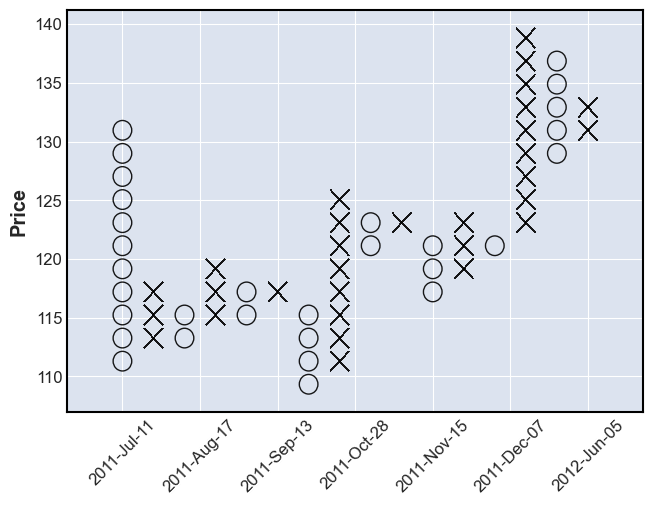

In [5]:
mpf.plot(daily,type='pnf')

### We can see how price movement plots eliminate noise compared to a line plot of the same data

### Similarly, we can also see this difference with the Point and Figure charts
- Notice how the arguments differ

[-5, 1, -1, 2, -2, 3, -2, 2, -1, 4, -2, 1]
[-5, 1, -1, 2, -1, 4, -1]
1, -1, 2, -1, 4, -1, 
[-5, 1, -1, 2, -1, 4, -1]


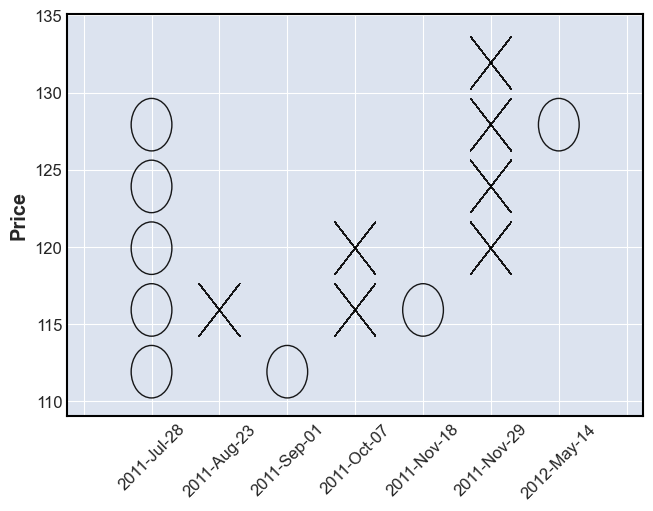

[-2, 2, -14, 3, -3, 5, -5, 6, -3, 1, -1, 2, -5, 3, -4, 7, -1, 3, -1, 3, -3, 2, -2, 2, -6, 6, -4, 4, -1, 8, -1, 4, -3, 1, -1, 2, -6, 1, -2, 4, -2, 2]
[-2, 1, -13, 2, -2, 4, -4, 5, -2, 1, -4, 2, -3, 10, -2, 1, -1, 1, -5, 5, -3, 13, -2, 1, -6, 3, -1, 1]
1, -13, 2, -2, 4, -4, 5, -2, 1, -4, 2, -3, 10, -2, 1, -1, 1, -5, 5, -3, 13, -2, 1, -6, 3, -1, 1, 
[-2, 1, -13, 2, -2, 4, -4, 5, -2, 1, -4, 2, -3, 10, -2, 1, -1, 1, -5, 5, -3, 13, -2, 1, -6, 3, -1, 1]


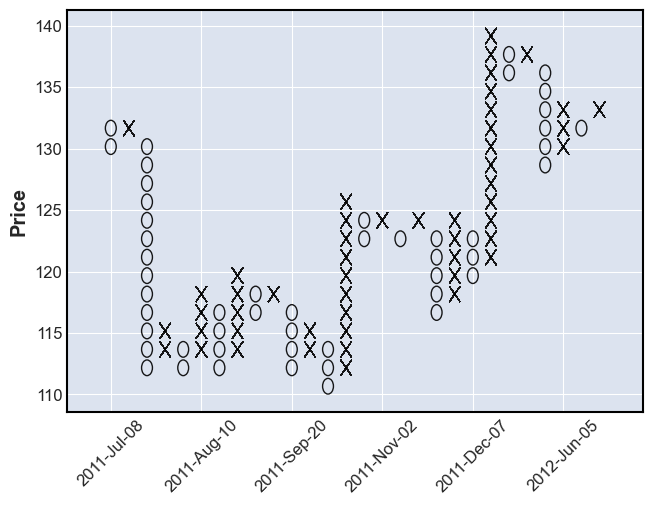

In [6]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size=4))
mpf.plot(daily,type='pnf',pnf_params=dict(box_size=1.5))

### In addition to `brick_size` and `atr_length` we can also specify the `reversal` value to change the number of boxes needed to create a new trend

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, -1, 0, -2, 5, -3, 2, -1, 5, -3, 1, 
[-8, 2, -2, 5, -3, 7, -3]


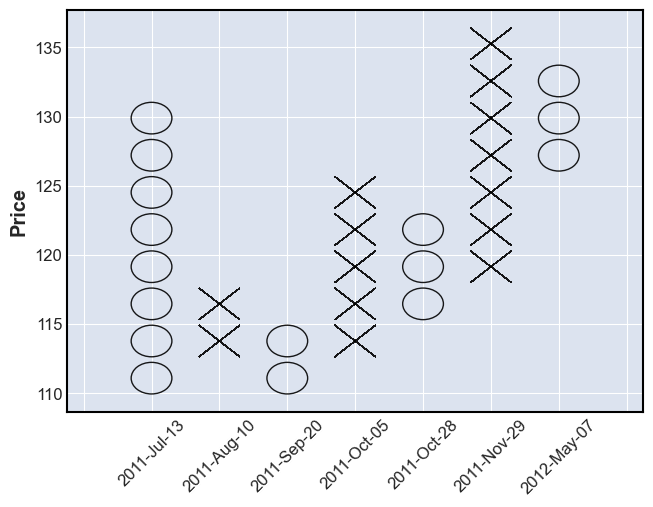

In [7]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=2))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1, 
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]


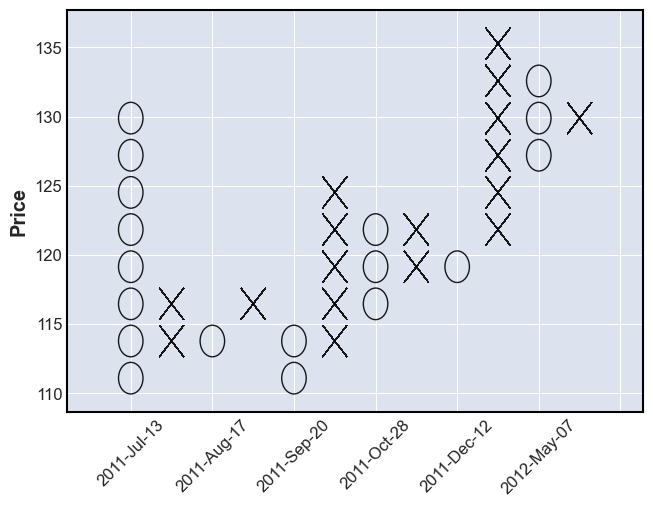

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1, 
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]


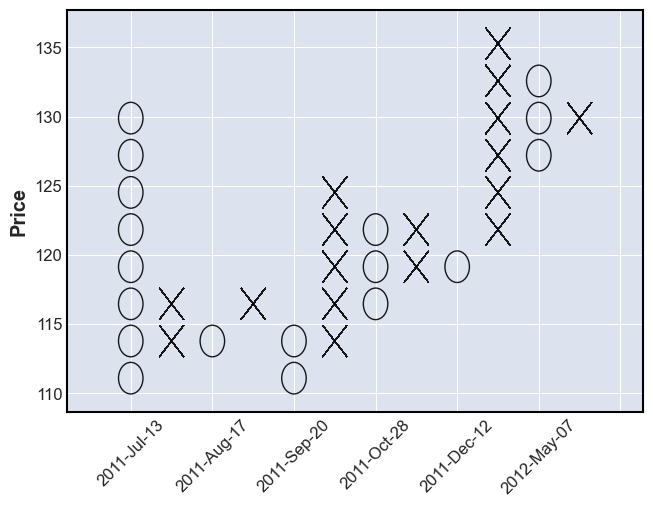

In [8]:
# These should have the same output
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=1))
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, 1, 2, 0, 5, -3, 2, 1, 7, -3, 1, 
[-8, 5, -3, 7, -3]


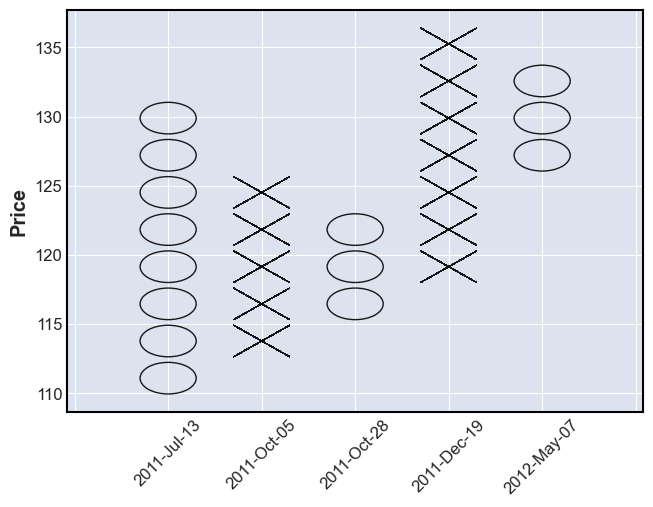

In [9]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=3))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, 1, 2, 0, 5, -3, -1, -2, 4, -3, -2, 
[-8, 9]


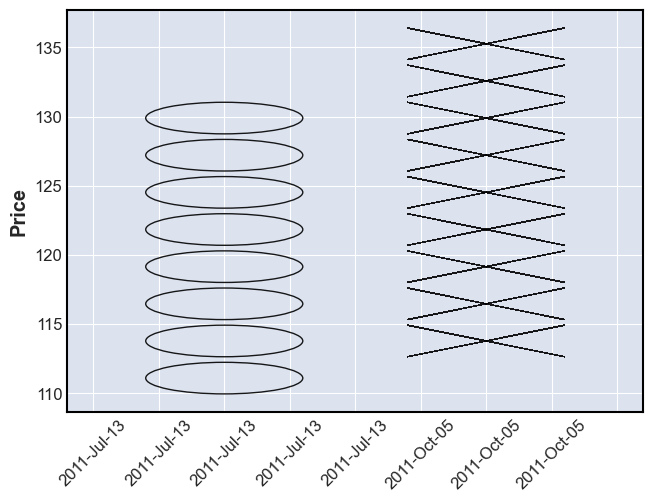

In [10]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=4))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, 1, 2, 0, 5, -3, -1, -2, 4, 1, 2, 
[-8, 9]


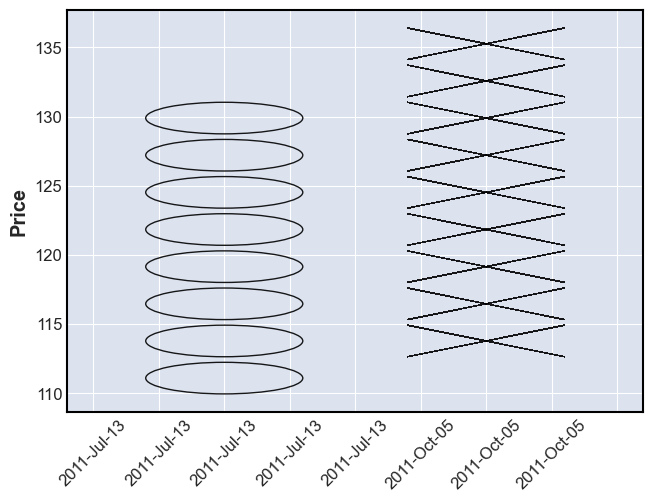

In [11]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=5))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, 1, 2, 0, 5, 2, 4, 3, 9, -3, -2, 
[-8, 9]


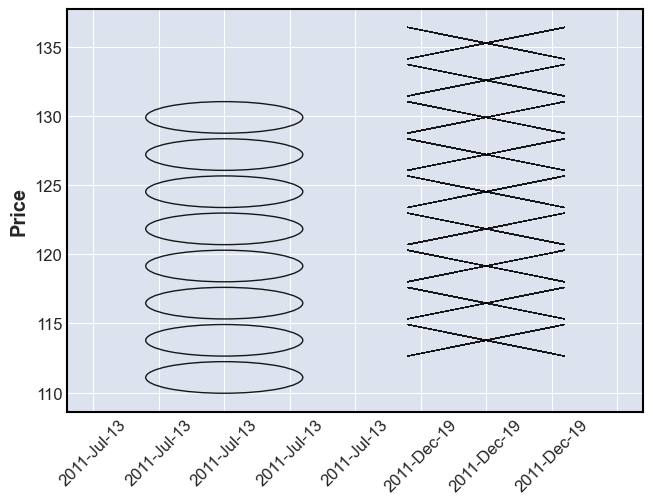

In [12]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=6))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, 1, 2, 0, 5, 2, 4, 3, 9, -3, -2, 
[-8, 9]


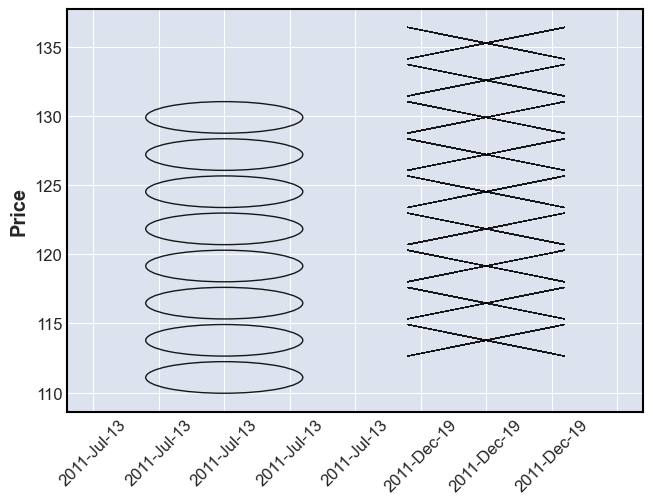

In [13]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=7))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, 1, 2, 0, 5, 2, 4, 3, 9, -3, -2, 
[-8, 9]


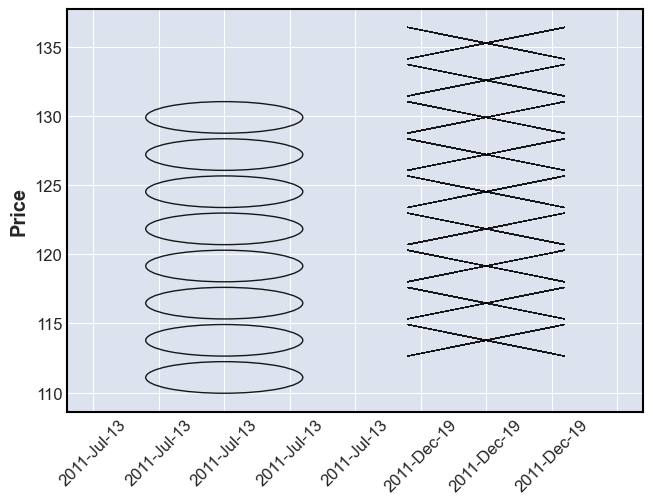

In [14]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=8))

[-1, 1, -8, 1, -1, 3, -2, 2, -1, 1, -3, 6, -2, 1, -1, 1, -3, 3, -2, 7, -1, 1, -4, 2]
[-8, 2, -1, 1, -2, 5, -3, 2, -1, 6, -3, 1]
2, 1, 2, 0, 5, 2, 4, 3, 9, -3, -2, 
[-8, 9]


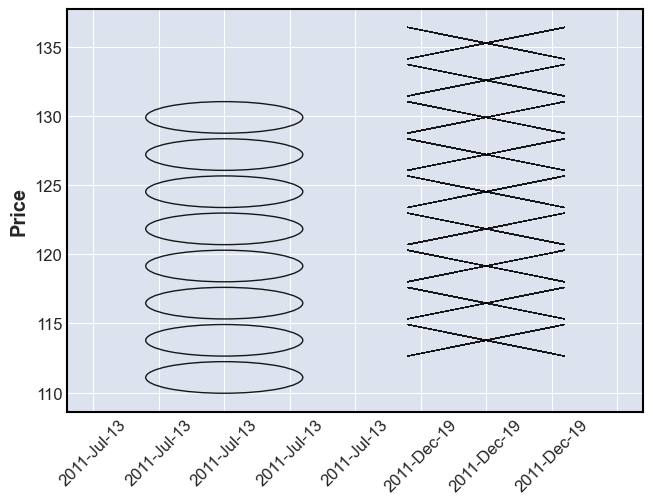

In [15]:
mpf.plot(daily,type='pnf',pnf_params=dict(box_size='atr', atr_length=2, reversal=9))

---
## ----------------------------------------------------------
# Using other plot functionalities with price movement charts

- Passing in data to the `addplot` argument will have no impact on the outputed plot as this feature is not supported
- It is also possible to customize the colors of price movement plots, show volume, and the moving average (mav).

In [16]:
# First we set the kwargs that we will use for the style examples:
renko_kwargs = dict(type='renko',mav=(8,20,30), volume=True,figratio=(10,8),figscale=0.75)
pnf_kwargs = dict(type='pnf',mav=(4,6,8), volume=True,figratio=(10,8),figscale=0.75)

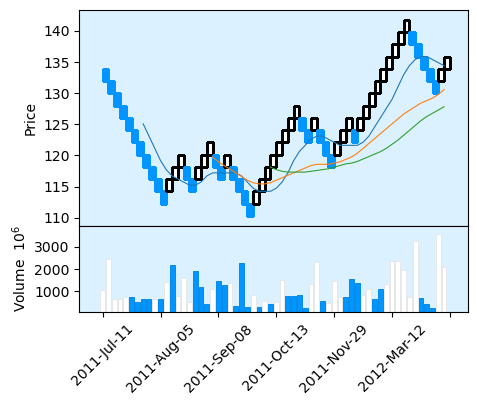

In [17]:
mpf.plot(daily,**renko_kwargs,style='blueskies')

[-1, 1, -11, 2, -1, 3, -3, 4, -2, 1, -2, 2, -3, 1, -3, 9, -3, 2, -1, 1, -4, 4, -2, 10, -2, 1, -5, 1, -1, 2, -1, 2]
[-11, 3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2]
3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2, 
[-11, 3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2]


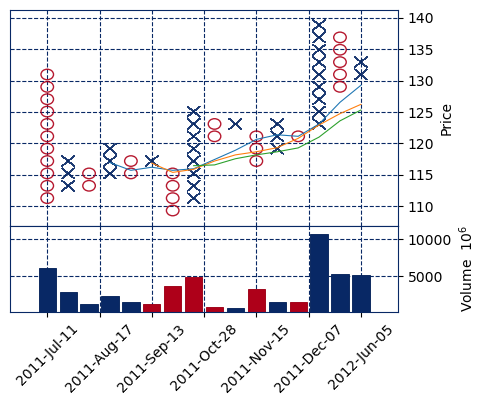

In [18]:
mpf.plot(daily,**pnf_kwargs,style='starsandstripes')

---

- for Renko charts within `marketcolors` one can specify colors for the `edges` and `up` and `down` brick colors.
- for Point & Figure plots within `marketcolors` one can specify colors for the `up` Xs and the `down` Os.

for example:

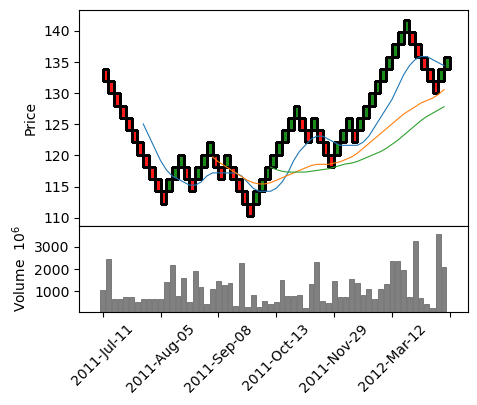

[-1, 1, -11, 2, -1, 3, -3, 4, -2, 1, -2, 2, -3, 1, -3, 9, -3, 2, -1, 1, -4, 4, -2, 10, -2, 1, -5, 1, -1, 2, -1, 2]
[-11, 3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2]
3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2, 
[-11, 3, -2, 3, -2, 1, -4, 8, -2, 1, -3, 3, -1, 9, -5, 2]


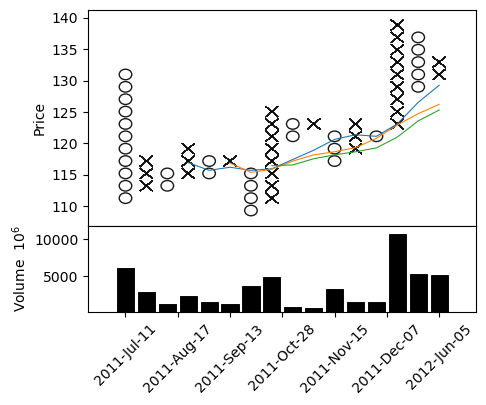

In [19]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           volume='gray')
s  = mpf.make_mpf_style(marketcolors=mc)

mc2 = mpf.make_marketcolors(up='gray',down='r',
                           volume='black')
s2  = mpf.make_mpf_style(marketcolors=mc2)

mpf.plot(daily,**renko_kwargs,style=s)
mpf.plot(daily,**pnf_kwargs, style=s2)